<a href="https://colab.research.google.com/github/baselhusam/Data-Preparation-Course-IEEE-CIS/blob/main/Lec2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Titanic Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")


## EDA Process

In [3]:
# Check the shape of the dataset
print('Number of rows and columns:', df.shape)

Number of rows and columns: (891, 12)


In [4]:
# Check the data types of each column
print('\nData types of each column:\n', df.dtypes)


Data types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Check the first five rows of the dataset
print('\nFirst five rows of the dataset:\n')
df.head()


First five rows of the dataset:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Check the last five rows of the dataset
print('\nLast five rows of the dataset:\n')
df.tail()


Last five rows of the dataset:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Check the basic summary statistics of numerical columns
print('\nSummary statistics of numerical columns:\n')
df.describe()


Summary statistics of numerical columns:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Extract meaningful information from the data

In [8]:
# Check the number of survivors and non-survivors
print('\nNumber of survivors and non-survivors:\n', df['Survived'].value_counts())



Number of survivors and non-survivors:
 0    549
1    342
Name: Survived, dtype: int64


In [9]:
# Check the number of male and female passengers
print('\nNumber of male and female passengers:\n', df['Sex'].value_counts())


Number of male and female passengers:
 male      577
female    314
Name: Sex, dtype: int64


In [10]:
# Check the number of passengers in each class
print('\nNumber of passengers in each class:\n', df['Pclass'].value_counts())



Number of passengers in each class:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


### Correlation Analysis

In [11]:
# Create a correlation matrix
corr_matrix = df.corr()

corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


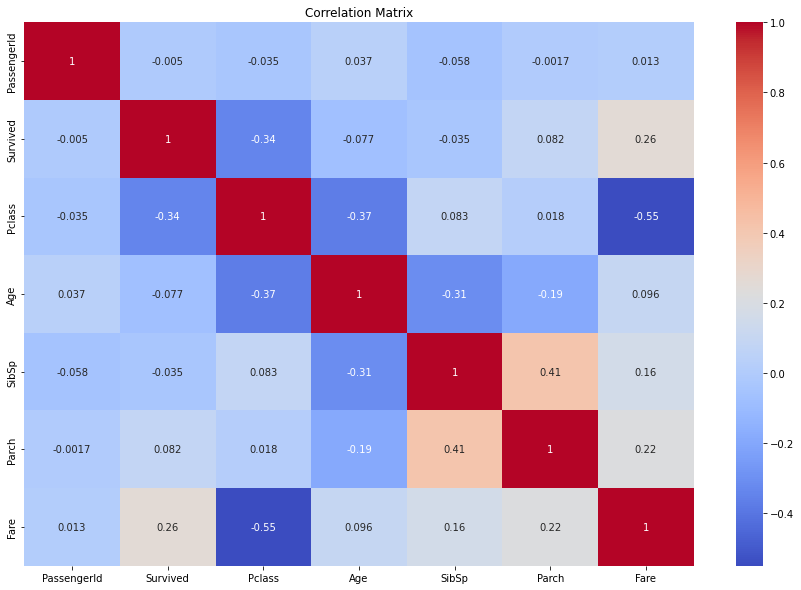

In [12]:
# Plot the correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Print the correlation values between 'Survived' and other features
print('\nCorrelation values between "Survived" and other features:\n', corr_matrix['Survived'])


Correlation values between "Survived" and other features:
 PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


In [20]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### Statistical Analysis

In [14]:
# Check the mean, median and mode of 'Age'
print('\nMean, median and mode of "Age":\n', df['Age'].mean(), df['Age'].median(), df['Age'].mode()[0])


Mean, median and mode of "Age":
 29.69911764705882 28.0 24.0


In [15]:
# Check the range, variance and standard deviation of 'Fare'
print('\nRange, variance and standard deviation of "Fare":\n', df['Fare'].max()-df['Fare'].min(), df['Fare'].var(), df['Fare'].std())


Range, variance and standard deviation of "Fare":
 512.3292 2469.436845743116 49.6934285971809


### Skewness

In [16]:
# Check the skewness of 'Age' and 'Fare'
print('\nSkewness of "Age" and "Fare":\n', df['Age'].skew(), df['Fare'].skew())


Skewness of "Age" and "Fare":
 0.38910778230082704 4.787316519674893


<AxesSubplot:>

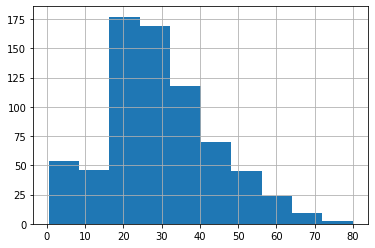

In [17]:
df['Age'].hist()

<AxesSubplot:>

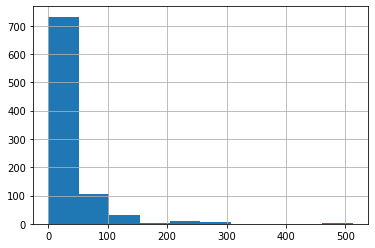

In [18]:
df['Fare'].hist()

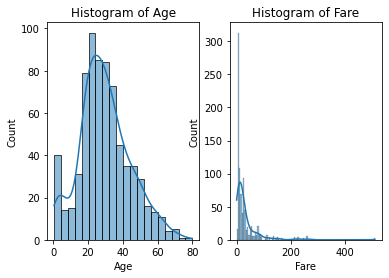

In [21]:
# Plot histograms to visualize the skewness
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')

plt.subplot(1,2,2)
sns.histplot(df['Fare'], kde=True)
plt.title('Histogram of Fare')

plt.show()

### Extract Information

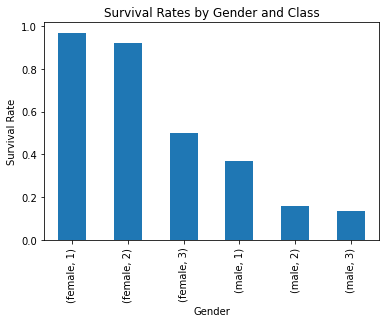

In [28]:
# Survival rates by gender and class
grouped_data = df.groupby(['Sex', 'Pclass']).mean()['Survived']

grouped_data.plot(kind='bar')
plt.title('Survival Rates by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

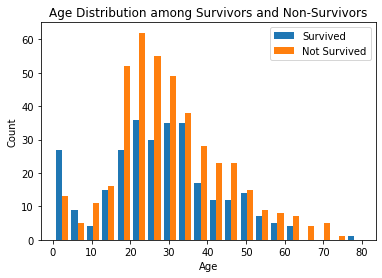

In [35]:
# Age distribution among survivors and non-survivors
survivors = df[df['Survived'] == 1]
non_survivors = df[df['Survived'] == 0]

plt.hist([survivors['Age'], non_survivors['Age']], bins=20, label=['Survived', 'Not Survived'])
plt.title('Age Distribution among Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

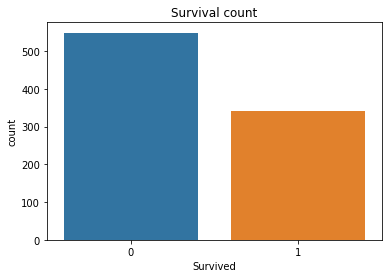

In [36]:
sns.countplot(x='Survived', data=df)
plt.title('Survival count')
plt.show()

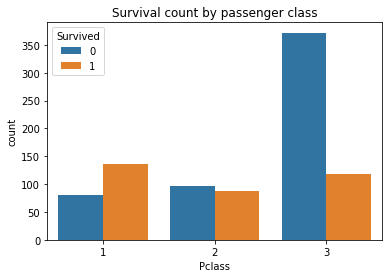

In [37]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival count by passenger class')
plt.show()


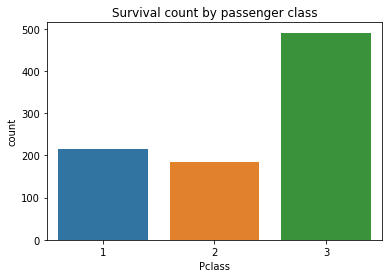

In [38]:
sns.countplot(x='Pclass', data=df)
plt.title('Survival count by passenger class')
plt.show()


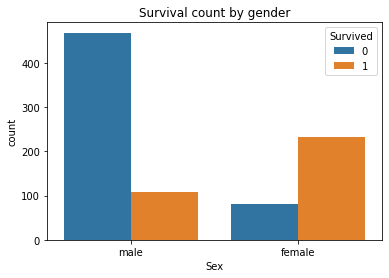

In [39]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival count by gender')
plt.show()

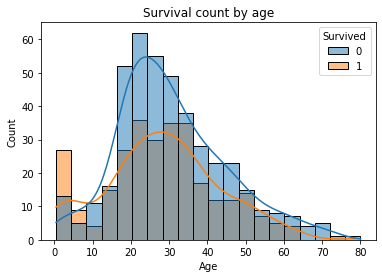

In [40]:
sns.histplot(x='Age', hue='Survived', data=df, bins=20, kde=True)
plt.title('Survival count by age')
plt.show()

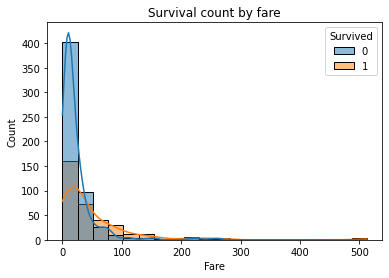

In [41]:
sns.histplot(x='Fare', hue='Survived', data=df, bins=20, kde=True)
plt.title('Survival count by fare')
plt.show()

In [42]:
# Group by passenger class and calculate survival rate
pclass_survival = df.groupby('Pclass')['Survived'].mean()
pclass_survival

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

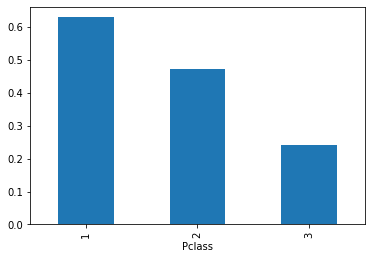

In [47]:
pclass_survival.plot(kind='bar');

In [48]:
# Group by passenger class and gender, and calculate survival rate
class_gender_survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
class_gender_survival

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [56]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


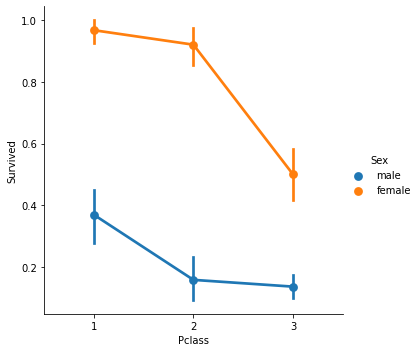

In [60]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

## EDA 2

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Show first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# print the shape
df.shape

(891, 12)

In [68]:
# get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df.select_dtypes(include='object').describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [71]:
# Group the data by sex and calculate the survival rate for each group
df.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [72]:
# Group the data by sex and calculate the survival rate for each group
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [73]:
# Group the data by sex and calculate the survival rate for each group
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [74]:
# Group the data by Pclass and calculate the survival rate for each group
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

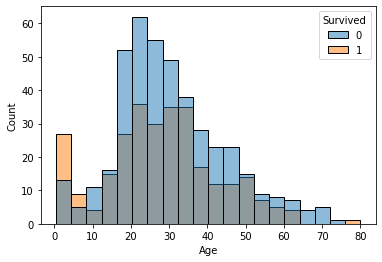

In [75]:
# Create histograms of Age for survivors and non-survivors
sns.histplot(data=df, x='Age', hue='Survived')
plt.show()

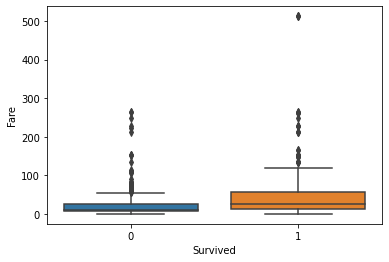

In [76]:
# Create a box plot of Fare for survivors and non-survivors
sns.boxplot(data=df, x='Survived', y='Fare')
plt.show()

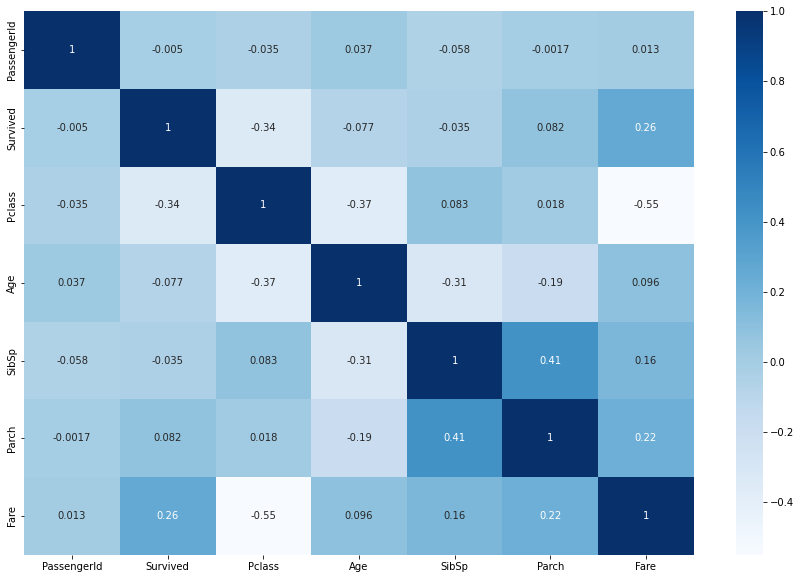

In [77]:
# Use a heatmap to check for correlations with the new variable
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


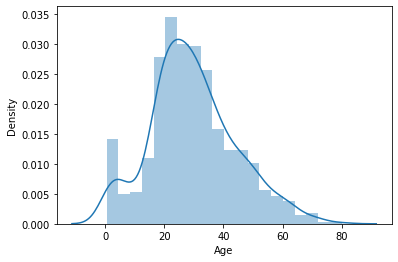

In [78]:
# Distribution for the Age feature
sns.distplot(df['Age'], hist=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


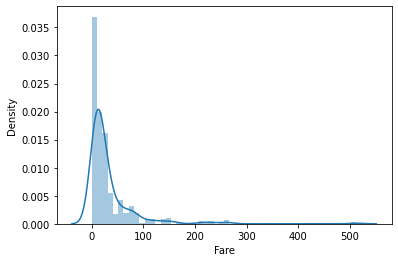

In [79]:
# Skewness for the Fare feature
sns.distplot(df['Fare'], hist=True);

## EDA 3 - From Scratch (With Students)

Data Link from [Kaggle](https://www.kaggle.com/competitions/titanic/data)